In [2]:
%load_ext autoreload
%autoreload 2
import physquirrel as sq
import random       
import numpy as np



**Generate a level-1 semi directed network**

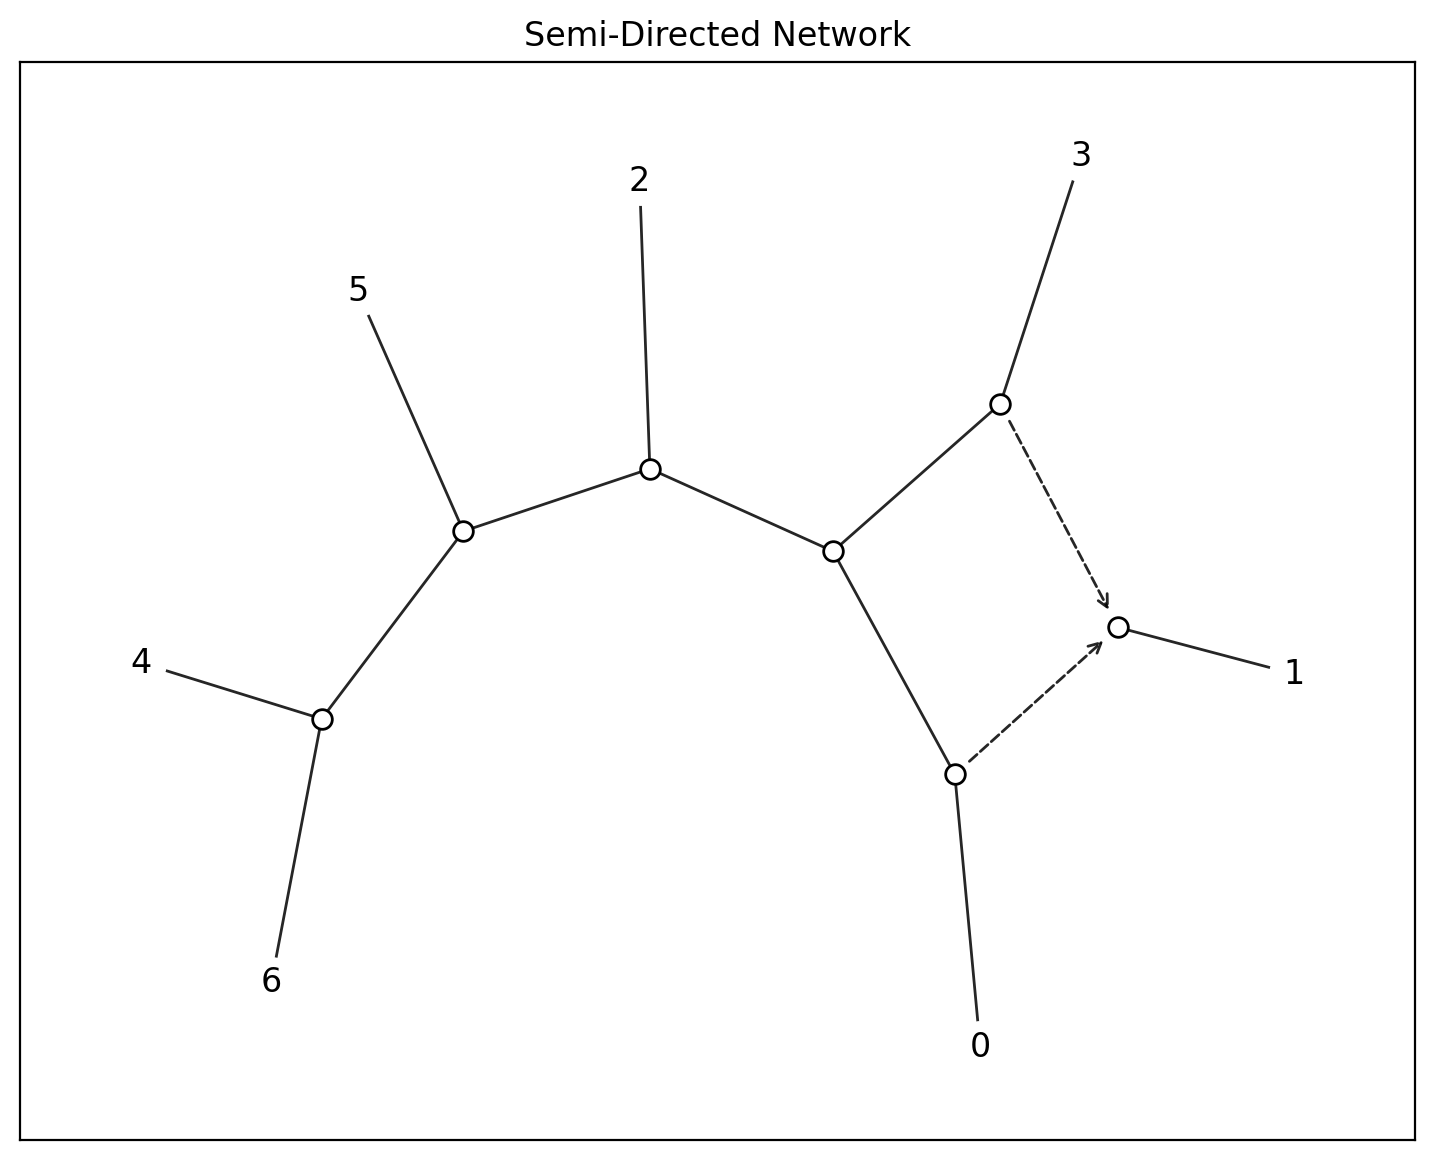

<Axes: title={'center': 'Semi-Directed Network'}>

In [3]:
seed = 348957
random.seed(seed)
np.random.seed(seed)
N = sq.sdnetwork.random_semi_directed_network(7, 1)
N.visualize()

**`Q` contains all induced quarnets of `N`**

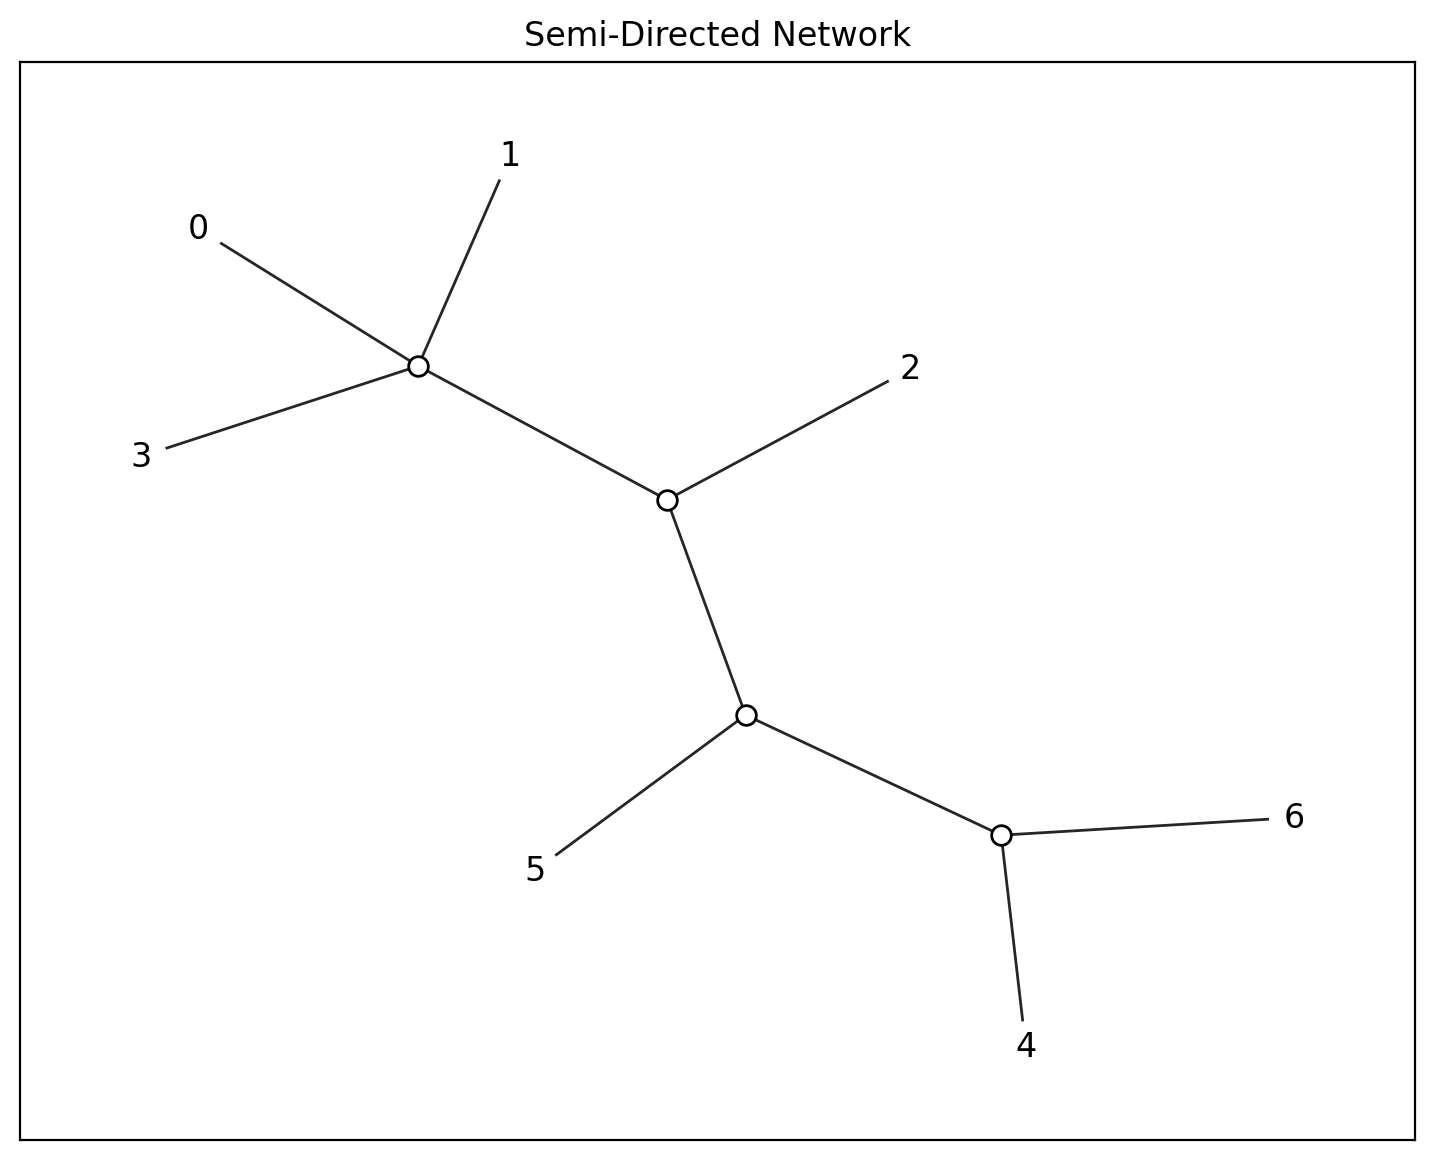

<Axes: title={'center': 'Semi-Directed Network'}>

In [4]:
Q, Q_splits = N.quarnets(triangles=False, return_4splits=True)
N_blob = N.blobtree()
N_blob.visualize()

**Change a portion of the quarnets in `Q` forming `Q_shake`**

In [14]:
Q_shake = Q._shake(epsilon=0)
Q_splits = Q_shake.quartetsplits()

sq_trees = Q_shake.squirrel(method = "return_trees", visualize=False)
##OUR METHOD HERE##

candidate_splits = Q_splits.bstar_penalty(threshold=50)
candidate_splits.remove_trivial_splits()
candidate_splits.list_sorted_penalties()
candidate_splits.print_sorted_by_penalty()


Split({'1', '3'}, {'6', '2', '0', '4', '5'}), Penalty: 0
Split({'4', '6'}, {'1', '3', '0', '2', '5'}), Penalty: 0
Split({'1', '0'}, {'3', '6', '2', '4', '5'}), Penalty: 0
Split({'6', '2', '5', '4'}, {'1', '3', '0'}), Penalty: 0
Split({'6', '4', '5'}, {'1', '3', '2', '0'}), Penalty: 0
Split({'1', '6', '2', '4', '5'}, {'3', '0'}), Penalty: 0
Split({'4', '5'}, {'1', '3', '2', '0', '6'}), Penalty: 4.0
Split({'6', '5'}, {'1', '3', '2', '0', '4'}), Penalty: 4.0
Split({'1', '6', '4', '5'}, {'2', '3', '0'}), Penalty: 6.0
Split({'1', '2', '0'}, {'3', '6', '4', '5'}), Penalty: 6.0
Split({'1', '2'}, {'3', '6', '0', '4', '5'}), Penalty: 6.0
Split({'1', '3', '2'}, {'6', '0', '5', '4'}), Penalty: 6.0
Split({'2', '5'}, {'1', '3', '0', '4', '6'}), Penalty: 6.0
Split({'3', '2'}, {'1', '6', '0', '4', '5'}), Penalty: 6.0
Split({'2', '6', '4'}, {'1', '3', '0', '5'}), Penalty: 6.0
Split({'2', '0'}, {'1', '3', '6', '4', '5'}), Penalty: 6.0
Split({'2', '4'}, {'1', '3', '0', '6', '5'}), Penalty: 7.0
Split({'2

In [6]:
tree, splitsystem = my_trees[-1].values()
tree.visualize()

NameError: name 'my_trees' is not defined

In [104]:
sq_scores = []
my_scores = []

for tree in sq_trees:
    sq_score = tree.similarity(N_blob)
    sq_scores.append(sq_score)

for tree_obj in my_trees:
    tree = tree_obj["tree"]
    my_score = tree.similarity(N_blob)
    my_scores.append(my_score)


In [105]:
print(my_scores)
print(sq_scores)

[0.6666666666666666, 0.8275862068965517, 0.8936170212765957, 0.9180327868852459, 0.9285714285714286]
[0.9285714285714286, 1.0, 1.0, 1.0, 1.0, 0]
